In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

# Machine Learning
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

In [5]:
df_market_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


In [6]:
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file


In [10]:
# Create a DataFrame with the scaled data


# Copy the crypto names from the original data

# Set the coinid column as index


# Display sample data

# step 1: initialize
scaler = StandardScaler()

# step 2: fit
scaler.fit(df_market_data)

# step 3: predict/transform
scaled_data = scaler.transform(df_market_data)
market_data_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns)
market_data_scaled.index = df_market_data.index # to bring back the coins


market_data_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [16]:
X = df_market_data

# Create a list with the number of k-values from 1 to 11
k = list(range(2, 12)) # k=1 breaks silhouette score metric so we are scooting everything over by one integer hehe 

In [17]:
# Create an empty list to store the inertia values

inertia = []
silhouettes = []
cha_chas = []
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for i in k:
    # initialize the model
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # fit the model
    k_model.fit(X)
    
    # predict the model
    preds = k_model.predict(X)
    
    # evaluate the model (generate the metics)
    inertia.append(k_model.inertia_)
    score = silhouette_score(X, preds)
    silhouettes.append(score)
    
    cha_cha = calinski_harabasz_score(X, preds)
    cha_chas.append(cha_cha)
    
    print(f"Finished {i} out of {max(k)}")

Finished 2 out of 11
Finished 3 out of 11
Finished 4 out of 11
Finished 5 out of 11
Finished 6 out of 11
Finished 7 out of 11
Finished 8 out of 11
Finished 9 out of 11
Finished 10 out of 11
Finished 11 out of 11


In [18]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia, "silhouette_score": silhouettes, "cha_score": cha_chas}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

df_elbow["acc"] = df_elbow.inertia.diff()
df_elbow.head(20) 

,k,inertia,silhouette_score,cha_score,acc
0,2,8.193204e+06,0.927521,294.124656,NaN
1,3,2.792811e+06,0.776251,457.110783,-5.400393e+06
2,4,8.352274e+05,0.674575,1021.074227,-1.957583e+06
3,5,4.373295e+05,0.574967,1431.222604,-3.978979e+05
4,6,2.721565e+05,0.483031,1793.011578,-1.651731e+05
5,7,2.132252e+05,0.408001,1854.213801,-5.893126e+04
6,8,1.742797e+05,0.341935,1888.348150,-3.894548e+04
7,9,1.360407e+05,0.396068,2053.722913,-3.823898e+04
8,10,9.936461e+04,0.393832,2422.514111,-3.667614e+04
9,11,7.366139e+04,0.384599,2847.212461,-2.570321e+04


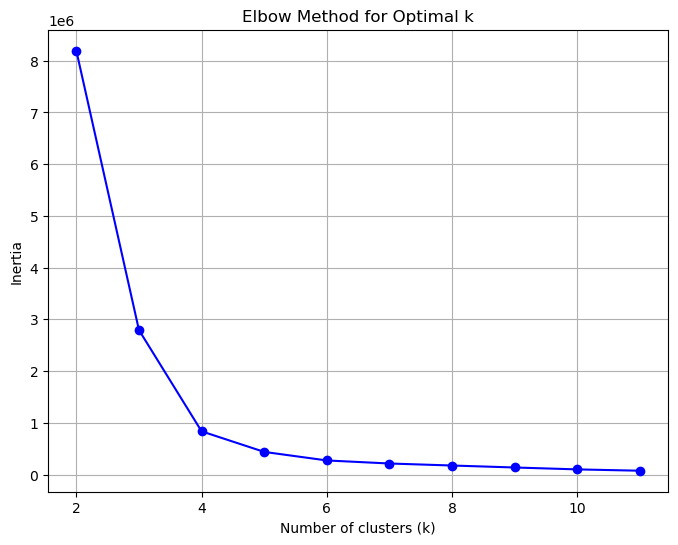

In [19]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(df_elbow["k"], df_elbow["inertia"], marker='o', linestyle='-', color='b')

# Add labels and title
plt.title('Elbow Curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

# Show grid for better visualization
plt.grid(True)

# Display the plot
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** k = 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [21]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [22]:
# Fit the K-Means model using the scaled data
model.fit(X)

KMeans(n_clusters=4, random_state=1)

In [23]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predict = model.predict(X)

# Print the resulting array of cluster values.
print(predict)

[0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 2 2 3
 0 0 0 2]


In [24]:
# Create a copy of the DataFrame
df_copy = df_market_data.copy()


In [25]:
# Add a new column to the DataFrame with the predicted clusters
df_copy['clusters'] = predict


# Display sample data
df_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,0
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,0
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,0


In [34]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.


scatter_plot = df_copy.hvplot.scatter(
    x='price_change_percentage_24h', 
    y='price_change_percentage_7d', 
    c='clusters',  # Color points based on K-Means cluster labels
    hover_cols=['coin_id'],  # Hover to show cryptocurrency names
    cmap='Category10',    # You can use a colormap like 'Category10' or any other
    title='K-Means Clustering of Cryptocurrencies'
)

scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,clusters,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [35]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components =3)

In [36]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
market_data_pca = pca.fit_transform(df_market_data)

# View the first five rows of the DataFrame. 
market_data_pca[:5]

array([[-341.80096268,  -51.36677548,   12.52547089],
       [-249.42046633,   24.11754777,  -14.23146597],
       [-402.61472077, -118.71073742,   24.83839662],
       [-406.75243715,  -79.48728629,    1.56633057],
       [-382.42994789, -103.43195906,   16.75307273]])

In [37]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([9.76037313e-01, 2.30282949e-02, 7.48308214e-04])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Aprox.  0.9998

In [44]:
# Create a new DataFrame with the PCA data. 
pca_df = pd.DataFrame(
    market_data_pca,
    columns=["PCA1", "PCA2", "PCA3"]
)

# Copy the crypto names from the original 
pca_df["coin_id"] = df_market_data.index

# Set the coinid column as index
pca_df.set_index("coin_id", inplace=True)

# Display sample data

pca_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-341.800963,-51.366775,12.525471
ethereum,-249.420466,24.117548,-14.231466
tether,-402.614721,-118.710737,24.838397
ripple,-406.752437,-79.487286,1.566331
bitcoin-cash,-382.429948,-103.431959,16.753073


---

### Find the Best Value for k Using the PCA Data

In [45]:
X = pca_df
# Create a list with the number of k-values from 1 to 11
k = list(range(2, 12)) # k=1 breaks silhouette score metric so we are scooting everything over by one integer hehe 

In [46]:
# Create an empty list to store the inertia values

inertia = []
silhouettes = []
cha_chas = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    # initialize the model
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # fit the model
    k_model.fit(X)
    
    # predict the model
    preds = k_model.predict(X)
    
    # evaluate the model (generate the metics)
    inertia.append(k_model.inertia_)
    score = silhouette_score(X, preds)
    silhouettes.append(score)
    
    cha_cha = calinski_harabasz_score(X, preds)
    cha_chas.append(cha_cha)
    
    print(f"Finished {i} out of {max(k)}")

Finished 2 out of 11
Finished 3 out of 11
Finished 4 out of 11
Finished 5 out of 11
Finished 6 out of 11
Finished 7 out of 11
Finished 8 out of 11
Finished 9 out of 11
Finished 10 out of 11
Finished 11 out of 11


In [47]:
elbow_data = {"k": k, "inertia": inertia, "silhouette_score": silhouettes, "cha_score": cha_chas}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

df_elbow["acc"] = df_elbow.inertia.diff()
df_elbow.head(20) 


,k,inertia,silhouette_score,cha_score,acc
0,2,8.180192e+06,0.927747,294.592434,NaN
1,3,2.779901e+06,0.777583,459.232818,-5.400291e+06
2,4,8.237471e+05,0.677644,1035.281527,-1.956154e+06
3,5,4.264175e+05,0.579869,1467.802967,-3.973296e+05
4,6,2.615079e+05,0.491843,1865.959193,-1.649096e+05
5,7,2.027058e+05,0.423476,1950.368216,-5.880211e+04
6,8,1.635232e+05,0.358436,2012.498474,-3.918263e+04
7,9,1.253996e+05,0.417236,2227.921591,-3.812357e+04
8,10,8.933120e+04,0.419152,2694.488268,-3.606840e+04
9,11,6.620848e+04,0.407768,3167.463276,-2.312272e+04


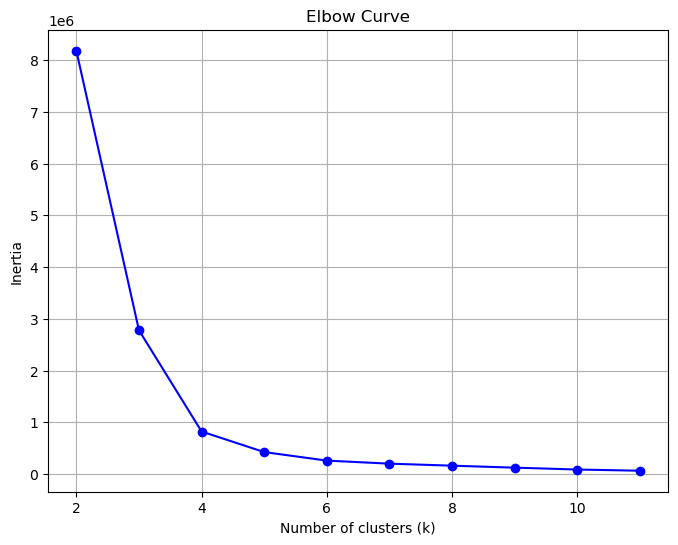

In [48]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(df_elbow["k"], df_elbow["inertia"], marker='o', linestyle='-', color='b')

# Add labels and title
plt.title('Elbow Curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

# Show grid for better visualization
plt.grid(True)

# Display the plot
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [49]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [50]:
# Fit the K-Means model using the PCA data
model.fit(X)

KMeans(n_clusters=4, random_state=1)

In [51]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predict = model.predict(X)

# Print the resulting array of cluster values.
print(predict)

[0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 2 2 3
 0 0 0 2]


In [52]:
# Create a copy of the DataFrame with the PCA data
df_pca_copy = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_copy['clusters'] = predict


# Display sample data
df_pca_copy.head()


,PCA1,PCA2,PCA3,clusters
coin_id,,,,
bitcoin,-341.800963,-51.366775,12.525471,0
ethereum,-249.420466,24.117548,-14.231466,0
tether,-402.614721,-118.710737,24.838397,0
ripple,-406.752437,-79.487286,1.566331,0
bitcoin-cash,-382.429948,-103.431959,16.753073,0


In [65]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.


scatter_plot = df_pca_copy.hvplot.scatter(
    x='PCA1', 
    y='PCA2', 
    c='clusters',  # Color points based on K-Means cluster labels
    hover_cols=['coin_id'],  # Hover to show cryptocurrency names
    cmap='Category10',    # You can use a colormap like 'Category10' or any other
    title='K-Means Clustering of Cryptocurrencies'
)

scatter_plot


:Scatter   [PCA1]   (PCA2,clusters,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

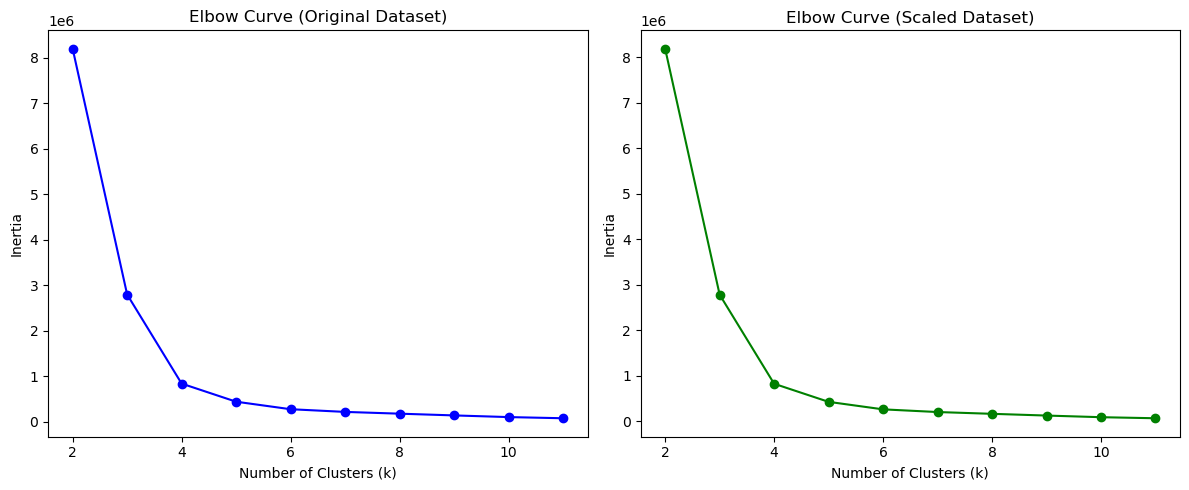

In [54]:
# Composite plot to contrast the Elbow curves

k_values = range(2, 12)  # Example: elbow curves with k ranging from 1 to 10
inertia_original = [8.193204e+06,  2.792811e+06, 8.352274e+05, 4.373295e+05, 2.721565e+05, 2.132252e+05, 1.742797e+05, 1.360407e+05, 9.936461e+04, 7.366139e+04]
inertia_scaled = [8.180192e+06,  2.779901e+06, 8.237471e+05, 4.264175e+05, 2.615079e+05, 2.027058e+05, 1.635232e+05, 1.253996e+05, 8.933120e+04, 6.620848e+04]

# Create a subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Elbow plot for original dataset
ax1.plot(k_values, inertia_original, marker='o', color='blue')
ax1.set_title('Elbow Curve (Original Dataset)')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')

# Elbow plot for scaled dataset
ax2.plot(k_values, inertia_scaled, marker='o', color='green')
ax2.set_title('Elbow Curve (Scaled Dataset)')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Inertia')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

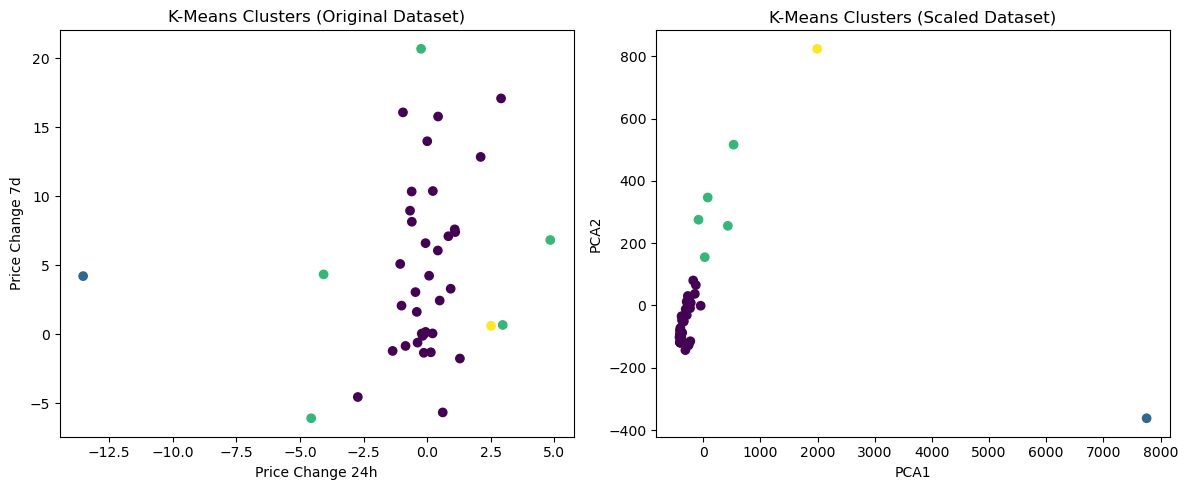

In [68]:
# Composite plot to contrast the clusters
# Assuming 'clusters' contains the K-Means labels for df_copy and df_pca_copy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Cluster graph for original dataset
ax1.scatter(df_copy['price_change_percentage_24h'], df_copy['price_change_percentage_7d'], c=df_copy['clusters'], cmap='viridis')
ax1.set_title('K-Means Clusters (Original Dataset)')
ax1.set_xlabel('Price Change 24h')
ax1.set_ylabel('Price Change 7d')

# Cluster graph for scaled dataset
ax2.scatter(df_pca_copy['PCA1'], df_pca_copy['PCA2'], c=df_pca_copy['clusters'], cmap='viridis')
ax2.set_title('K-Means Clusters (Scaled Dataset)')
ax2.set_xlabel('PCA1')
ax2.set_ylabel('PCA2')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** In the original dataset, the datapoints have a greater dispersion, by using PCA to dimensionally reduce the dataset to have fewer features, the datapoints are much more compact and there are more clearly defined clusters. 